# Ising Model Animation

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imageio
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import subprocess

In [217]:
x_pixels = 200
y_pixels = 200

data1 = pd.read_csv(r'FILL_IN')
data2 = pd.read_csv(r'FILL_IN')

### Frame of animation

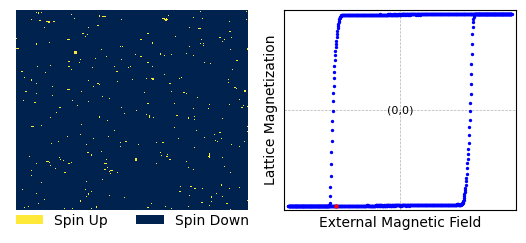

In [218]:
DPI = 100
x_pixels, y_pixels = data1.shape[1], data1.shape[0]
width_inch = x_pixels / DPI
height_inch = y_pixels / DPI

fig = plt.figure(figsize=(width_inch * 2 + 1, height_inch), dpi=DPI)
gs = GridSpec(1, 3, width_ratios=[1, -0.3, 1]) 

# First subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
X = np.linspace(0, 1, x_pixels)
Y = np.linspace(0, 1, y_pixels)
c = ax1.pcolormesh(X, Y, data1, cmap='cividis')
cividis = plt.get_cmap('cividis')
spin_up_color = cividis(1.0)
spin_down_color = cividis(0.0)
legend_elements = [
    Patch(facecolor=spin_up_color, edgecolor='none', label='Spin Up'),
    Patch(facecolor=spin_down_color, edgecolor='none', label='Spin Down')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=2, fontsize=10, frameon=False, bbox_to_anchor=(0.232, -0.15))

# Second subplot
ax2 = fig.add_subplot(gs[0, 2]) 
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.3)
ax2.axvline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.3)
ax2.scatter(data2.iloc[:, 0], data2.iloc[:, 1], c='b', s=2)
ii = 150
ax2.scatter(data2.iloc[ii, 0], data2.iloc[ii, 1], c='r', s=5)
x_margin = 0.02 * (data2.iloc[:, 0].max() - data2.iloc[:, 0].min())
y_margin = 0.02 * (data2.iloc[:, 1].max() - data2.iloc[:, 1].min())
ax2.set_xlim(data2.iloc[:, 0].min() - x_margin, data2.iloc[:, 0].max() + x_margin)
ax2.set_ylim(data2.iloc[:, 1].min() - y_margin, data2.iloc[:, 1].max() + y_margin)
ax2.set_xlabel(r'External Magnetic Field', fontsize=10)
ax2.set_ylabel(r'Lattice Magnetization', fontsize=10)
ax2.text(0, 0, '(0,0)', fontsize=8, ha='center', va='center', color='black', alpha=1.0)
ax2.set_xticks([])
ax2.set_yticks([])

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.4)
plt.margins(0, 0)
plt.show()

### Produce frames

In interest of not making a long boring animation, I skip frames during the parts of the animatino where there is no transition between the spin majority being up or down. Without skipping frames, frame 0535 though 0585 and 1230 though 1275 are particularly interesting. Without skipping, the frames range from 0000 to 1399

In [ ]:
def load_data(filepath):
    return np.loadtxt(filepath, delimiter=',', usecols=range(x_pixels))

def save_frame(data, data_index, frame_number, output_dir):
    DPI = 100
    x_pixels, y_pixels = data1.shape[1], data1.shape[0]
    width_inch = x_pixels / DPI
    height_inch = y_pixels / DPI

    fig = plt.figure(figsize=(width_inch * 2 + 1, height_inch), dpi=DPI)
    gs = GridSpec(1, 3, width_ratios=[1, -0.3, 1]) 

    # First subplot: data1 with no axes
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.axis('off')
    X = np.linspace(0, 1, x_pixels)
    Y = np.linspace(0, 1, y_pixels)
    c = ax1.pcolormesh(X, Y, data, cmap='cividis')
    cividis = plt.get_cmap('cividis')
    spin_up_color = cividis(1.0)
    spin_down_color = cividis(0.0)
    legend_elements = [
        Patch(facecolor=spin_up_color, edgecolor='none', label='Spin Up'),
        Patch(facecolor=spin_down_color, edgecolor='none', label='Spin Down')
    ]
    fig.legend(handles=legend_elements, loc='lower center', ncol=2, fontsize=10, frameon=False, bbox_to_anchor=(0.232, -0.15))

    # Second subplot: scatter plot with data2 and axes
    ax2 = fig.add_subplot(gs[0, 2]) 
    ax2.axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.3)
    ax2.axvline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.3)
    ax2.scatter(data2.iloc[:, 0], data2.iloc[:, 1], c='b', s=2)
    ax2.scatter(data2.iloc[j, 0], data2.iloc[j, 1], c='r', s=5)
    x_margin = 0.02 * (data2.iloc[:, 0].max() - data2.iloc[:, 0].min())
    y_margin = 0.02 * (data2.iloc[:, 1].max() - data2.iloc[:, 1].min())
    ax2.set_xlim(data2.iloc[:, 0].min() - x_margin, data2.iloc[:, 0].max() + x_margin)
    ax2.set_ylim(data2.iloc[:, 1].min() - y_margin, data2.iloc[:, 1].max() + y_margin)
    ax2.set_xlabel(r'External Magnetic Field', fontsize=10)
    ax2.set_ylabel(r'Lattice Magnetization', fontsize=10)
    ax2.text(0, 0, '(0,0)', fontsize=8, ha='center', va='center', color='black', alpha=1.0)
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.4) 
    plt.margins(0, 0)
    
    filename = f'frame_{frame_number:04d}.png'
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=DPI, facecolor='white', edgecolor='white', bbox_inches='tight', format='png')
    plt.close(fig)

csv_dir = r'FILL_IN'
output_dir = r'FILL_IN'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

filenames = []
indicies = []
j = 0
for i in range(350, 0, -1):
    if (j % 5 == 0) or (535 <= j <= 585) or (1230 <= j <= 1275):
        filenames.append(f'Ising_output_grid_up{(i * -0.001):.6f}.csv')
        indicies.append(j)
    j += 1
for i in range(350):
    if (j % 5 == 0) or (535 <= j <= 585) or (1230 <= j <= 1275):    
        filenames.append(f'Ising_output_grid_up{(i * 0.001):.6f}.csv')
        indicies.append(j)
    j += 1
for i in range(350, 0, -1):
    if (j % 5 == 0) or (535 <= j <= 585) or (1230 <= j <= 1275):
        filenames.append(f'Ising_output_grid_down{(i * 0.001):.6f}.csv')
        indicies.append(j)
    j += 1
for i in range(350):
    if (j % 5 == 0) or (535 <= j <= 585) or (1230 <= j <= 1275):
        filenames.append(f'Ising_output_grid_down{-(i * 0.001):.6f}.csv')
        indicies.append(j)
    j += 1
    
for i, filename in enumerate(filenames):
    filepath = os.path.join(csv_dir, filename)
    if os.path.exists(filepath):
        data = load_data(filepath)
        j = indicies[i]
        save_frame(data, j, i, output_dir)
    else:
        print(f"File not found: {filepath}")

print(f'Saved frames to {output_dir}')

### Produce basic animation


In [ ]:
frames_dir = r'FILL_IN'
output_video_path = r'FILL_IN'
fps = 10

ffmpeg_command = [
    'ffmpeg',
    '-framerate', str(fps),
    '-i', os.path.join(frames_dir, 'frame_%04d.png'),
    '-c:v', 'libx265',
    '-preset', 'veryslow',
    '-crf', '0', # lower constant rate factor should be better quality
    '-pix_fmt', 'yuv444p', # pixel format is interesting
    '-vf', 'scale=1920:1080',
    output_video_path
]
subprocess.run(ffmpeg_command, check=True)

print(f'Video saved to {output_video_path}')